#**Assignment - 01: Image Classification: A Comparison of Manhattan (L1) and Euclidean (L2) Distances with 5-fold Cross-Validation**
- Raiyen Zayed Rakin
- ID: 23-50071-1
- Computer Vision & Pattern Recognition




In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Import Libraries**

In [59]:
import os
import random
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

#**Load Dataset and Preprocess Data**
###*(Resize(32x32), converting to grayscale and Numpy Arrays)*

In [60]:
TRAIN_DIR = '/content/drive/MyDrive/animal_dataset'
CATEGORIES = ['cat', 'dog', 'panda']
print("Categories:", CATEGORIES)

TRAIN_DATA = []
IMAGE_SIZE = 32

for c in CATEGORIES:
    path = os.path.join(TRAIN_DIR, c)
    class_num = CATEGORIES.index(c)
    image_count = 0
    for img in tqdm(os.listdir(path), desc=f"Loading {c}"):
        if image_count >= 100:  # Load only 100 images per class
            break
        try:
            # Load image
            img_pil = Image.open(os.path.join(path, img))
            #Resize
            img_resized = img_pil.resize((IMAGE_SIZE, IMAGE_SIZE), Image.LANCZOS)
            #Grayscale
            img_gray = img_resized.convert('L')
            # Convert to numpy array
            img_arr = np.array(img_gray)

            TRAIN_DATA.append([img_arr, class_num])
            image_count += 1
        except Exception as e:
            print(f"Error loading {img}: {e}")
            continue

print(f"\nTotal images loaded: {len(TRAIN_DATA)}")
print(f"Image dimensions: {IMAGE_SIZE}x{IMAGE_SIZE} grayscale")


Categories: ['cat', 'dog', 'panda']


Loading panda: 100%|██████████| 100/100 [00:00<00:00, 110.55it/s]


Total images loaded: 300
Image dimensions: 32x32 grayscale


#**Visualize Preprocessed Images**

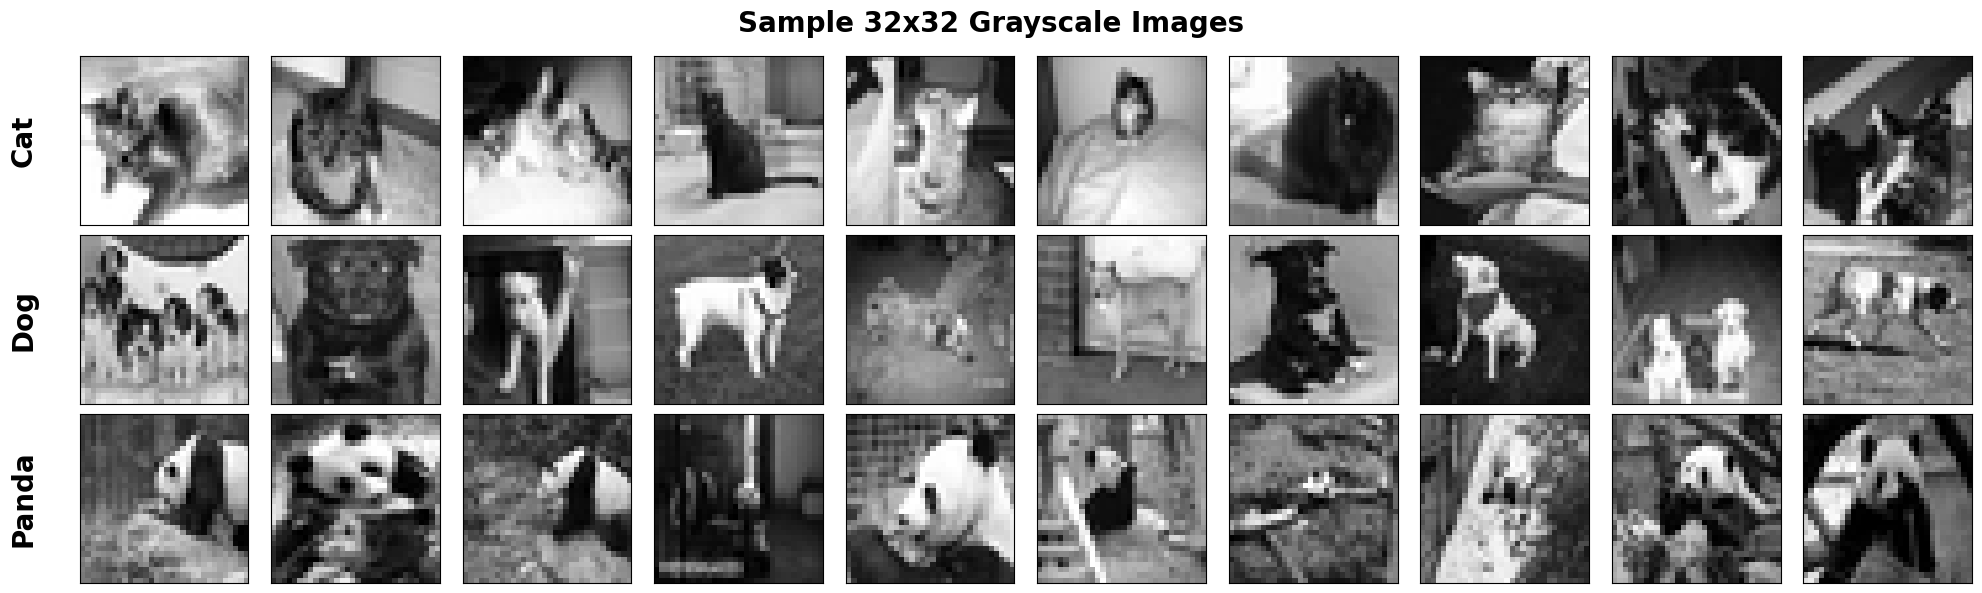

In [61]:
plt.figure(figsize=(20, 6))

# Separate images by class, 0-cat, 1-dog, 2-panda
cat_images = [item for item in TRAIN_DATA if item[1] == 0][:10]
dog_images = [item for item in TRAIN_DATA if item[1] == 1][:10]
panda_images = [item for item in TRAIN_DATA if item[1] == 2][:10]

#Cats
for i in range(10):
    plt.subplot(3, 10, i + 1)
    image_gray = cat_images[i][0]
    plt.imshow(image_gray, cmap="gray")
    if i == 0:
        plt.ylabel("Cat", fontsize=20, fontweight='bold', rotation=90, labelpad=30)
    plt.xticks([])
    plt.yticks([])

#Dogs
for i in range(10):
    plt.subplot(3, 10, 10 + i + 1)
    image_gray = dog_images[i][0]
    plt.imshow(image_gray, cmap="gray")
    if i == 0:
        plt.ylabel("Dog", fontsize=20, fontweight='bold', rotation=90, labelpad=30)
    plt.xticks([])
    plt.yticks([])

#Pandas
for i in range(10):
    plt.subplot(3, 10, 20 + i + 1)
    image_gray = panda_images[i][0]
    plt.imshow(image_gray, cmap="gray")
    if i == 0:
        plt.ylabel("Panda", fontsize=20, fontweight='bold', rotation=90, labelpad=30)
    plt.xticks([])
    plt.yticks([])

plt.suptitle("Sample 32x32 Grayscale Images", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

#**Partitioning dataset for 5-fold cross-validation**

In [62]:
#Shuffling data or else it will be biased.
random.shuffle(TRAIN_DATA)
f0 = TRAIN_DATA[0:60]
f1 = TRAIN_DATA[60:120]
f2 = TRAIN_DATA[120:180]
f3 = TRAIN_DATA[180:240]
f4 = TRAIN_DATA[240:300]

print("Folds created (60 images each for 5-fold cross-validation):")
print(f"  Fold 0: {len(f0)} images")
print(f"  Fold 1: {len(f1)} images")
print(f"  Fold 2: {len(f2)} images")
print(f"  Fold 3: {len(f3)} images")
print(f"  Fold 4: {len(f4)} images")
print(f"  Total: {len(f0) + len(f1) + len(f2) + len(f3) + len(f4)} images")

Folds created (60 images each for 5-fold cross-validation):
  Fold 0: 60 images
  Fold 1: 60 images
  Fold 2: 60 images
  Fold 3: 60 images
  Fold 4: 60 images
  Total: 300 images


#**5-Fold Images Visualization and Image Count**

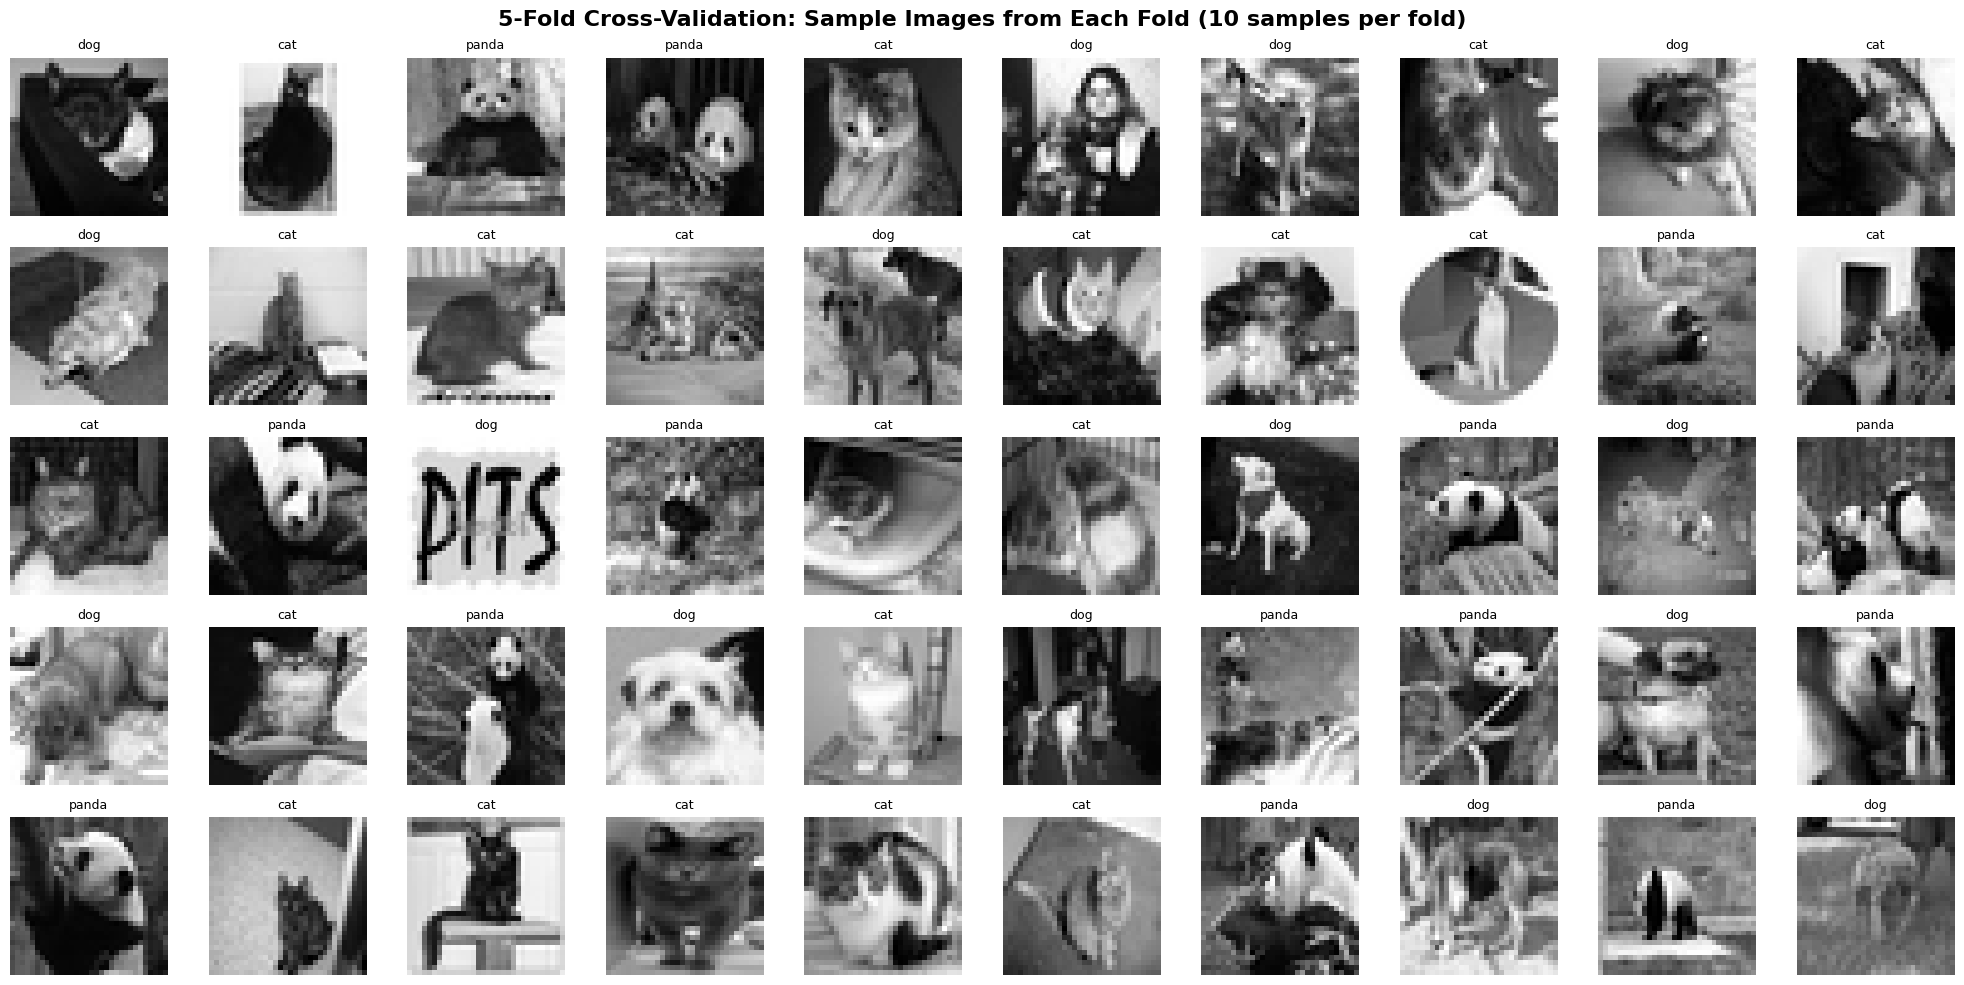




Cross-Validation Fold Statistics:
Fold 0: Cat=20, Dog=19, Panda=21 | Total=60 images
Fold 1: Cat=18, Dog=21, Panda=21 | Total=60 images
Fold 2: Cat=23, Dog=18, Panda=19 | Total=60 images
Fold 3: Cat=21, Dog=24, Panda=15 | Total=60 images
Fold 4: Cat=18, Dog=18, Panda=24 | Total=60 images



Cross-Validation Splits:
Split 1: Train=[Fold 1, Fold 2, Fold 3, Fold 4] (240 imgs) | Validation=[Fold 0] (60 imgs)
Split 2: Train=[Fold 0, Fold 2, Fold 3, Fold 4] (240 imgs) | Validation=[Fold 1] (60 imgs)
Split 3: Train=[Fold 0, Fold 1, Fold 3, Fold 4] (240 imgs) | Validation=[Fold 2] (60 imgs)
Split 4: Train=[Fold 0, Fold 1, Fold 2, Fold 4] (240 imgs) | Validation=[Fold 3] (60 imgs)
Split 5: Train=[Fold 0, Fold 1, Fold 2, Fold 3] (240 imgs) | Validation=[Fold 4] (60 imgs)


In [63]:
folds = [f0, f1, f2, f3, f4]
fold_names = ['Fold 0', 'Fold 1', 'Fold 2', 'Fold 3', 'Fold 4']

fig = plt.figure(figsize=(20, 10))

for fold_idx, fold in enumerate(folds):
    for img_idx in range(10):
        ax = plt.subplot(5, 10, fold_idx * 10 + img_idx + 1)
        if img_idx < len(fold):
            image_gray = fold[img_idx * 6][0]  # Sample every 6th image to get variety
            ax.imshow(image_gray, cmap="gray")
            if img_idx == 0:
                ax.set_ylabel(fold_names[fold_idx], fontsize=12, fontweight='bold', rotation=0, labelpad=40)
            ax.set_title(CATEGORIES[fold[img_idx * 6][1]], fontsize=9)
        ax.axis('off')

plt.suptitle('5-Fold Cross-Validation: Sample Images from Each Fold (10 samples per fold)',
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

#image counts for each folds
print("\n\n\nCross-Validation Fold Statistics:")
for fold_idx, fold in enumerate(folds):
    class_counts = {0: 0, 1: 0, 2: 0}
    for item in fold:
        class_counts[item[1]] += 1
    print(f"Fold {fold_idx}: Cat={class_counts[0]:2d}, Dog={class_counts[1]:2d}, "
          f"Panda={class_counts[2]:2d} | Total={len(fold):2d} images")

print("\n\n\nCross-Validation Splits:")
cv_splits = [
    {'name': 'Split 1', 'train': [1, 2, 3, 4], 'val': [0]},
    {'name': 'Split 2', 'train': [0, 2, 3, 4], 'val': [1]},
    {'name': 'Split 3', 'train': [0, 1, 3, 4], 'val': [2]},
    {'name': 'Split 4', 'train': [0, 1, 2, 4], 'val': [3]},
    {'name': 'Split 5', 'train': [0, 1, 2, 3], 'val': [4]},
]

for i, split in enumerate(cv_splits):
    train_folds = ', '.join([f'Fold {f}' for f in split['train']])
    val_fold = f"Fold {split['val'][0]}"
    print(f"{split['name']}: Train=[{train_folds}] (240 imgs) | Validation=[{val_fold}] (60 imgs)")

#**Employing KNN by Calculating Manhattan(l1) and Euclidian(l2) Distances**

In [64]:
k_max = 15

#Manhattan
def l1_dist(x, y):
    return np.sum(np.abs(x - y))

#Euclidean
def l2_dist(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

#**Model training for k-NN Classification**

In [65]:
mean_accuracies_l1 = []
std_accuracies_l1 = []
mean_accuracies_l2 = []
std_accuracies_l2 = []

print("\nStarting 5-fold cross-validation...")
print("Testing k values from 1 to", k_max)

for k_val in range(1, k_max + 1, 2):
    fold_accuracies_l1 = []
    fold_accuracies_l2 = []

    print(f"\nTesting k = {k_val}")

    for fold in tqdm(range(5), desc=f'  5-fold CV for k={k_val}'):
        if fold == 0:
            train = f1 + f2 + f3 + f4
            validation = f0
        elif fold == 1:
            train = f0 + f2 + f3 + f4
            validation = f1
        elif fold == 2:
            train = f0 + f1 + f3 + f4
            validation = f2
        elif fold == 3:
            train = f0 + f1 + f2 + f4
            validation = f3
        elif fold == 4:
            train = f0 + f1 + f2 + f3
            validation = f4

        acc_l1 = 0
        acc_l2 = 0

        for v in validation:
            v_gray = v[0]
            l1_dists = []
            l2_dists = []
            for t in train:
                t_gray = t[0]
                l1 = l1_dist(v_gray, t_gray)
                l2 = l2_dist(v_gray, t_gray)
                l1_dists.append((l1, t[1]))
                l2_dists.append((l2, t[1]))
            l1_dists.sort(key=lambda x: x[0])
            l2_dists.sort(key=lambda x: x[0])

            neighbors_l1 = [d[1] for d in l1_dists[:k_val]]
            counts_l1 = np.bincount(neighbors_l1)
            pred_l1 = np.argmax(counts_l1)

            neighbors_l2 = [d[1] for d in l2_dists[:k_val]]
            counts_l2 = np.bincount(neighbors_l2)
            pred_l2 = np.argmax(counts_l2)

            if pred_l1 == v[1]:
                acc_l1 += 1
            if pred_l2 == v[1]:
                acc_l2 += 1

        fold_accuracies_l1.append(acc_l1 / len(validation))
        fold_accuracies_l2.append(acc_l2 / len(validation))

    mean_accuracies_l1.append(np.mean(fold_accuracies_l1))
    std_accuracies_l1.append(np.std(fold_accuracies_l1))
    mean_accuracies_l2.append(np.mean(fold_accuracies_l2))
    std_accuracies_l2.append(np.std(fold_accuracies_l2))

    print(f"  L1 Mean Accuracy: {np.mean(fold_accuracies_l1):.4f} ± {np.std(fold_accuracies_l1):.4f}")
    print(f"  L2 Mean Accuracy: {np.mean(fold_accuracies_l2):.4f} ± {np.std(fold_accuracies_l2):.4f}")

print("\nTraining complete.")



Starting 5-fold cross-validation...
Testing k values from 1 to 15

Testing k = 1


  5-fold CV for k=1: 100%|██████████| 5/5 [00:01<00:00,  2.64it/s]


  L1 Mean Accuracy: 0.4200 ± 0.0440
  L2 Mean Accuracy: 0.3700 ± 0.0552

Testing k = 3


  5-fold CV for k=3: 100%|██████████| 5/5 [00:01<00:00,  3.15it/s]


  L1 Mean Accuracy: 0.3900 ± 0.0620
  L2 Mean Accuracy: 0.4033 ± 0.0653

Testing k = 5


  5-fold CV for k=5: 100%|██████████| 5/5 [00:01<00:00,  3.91it/s]


  L1 Mean Accuracy: 0.4533 ± 0.0974
  L2 Mean Accuracy: 0.4033 ± 0.0581

Testing k = 7


  5-fold CV for k=7: 100%|██████████| 5/5 [00:01<00:00,  4.43it/s]


  L1 Mean Accuracy: 0.4267 ± 0.0854
  L2 Mean Accuracy: 0.4067 ± 0.0544

Testing k = 9


  5-fold CV for k=9: 100%|██████████| 5/5 [00:01<00:00,  4.52it/s]


  L1 Mean Accuracy: 0.4167 ± 0.0641
  L2 Mean Accuracy: 0.4067 ± 0.0720

Testing k = 11


  5-fold CV for k=11: 100%|██████████| 5/5 [00:01<00:00,  4.40it/s]


  L1 Mean Accuracy: 0.4300 ± 0.0510
  L2 Mean Accuracy: 0.3900 ± 0.0793

Testing k = 13


  5-fold CV for k=13: 100%|██████████| 5/5 [00:01<00:00,  4.46it/s]


  L1 Mean Accuracy: 0.4300 ± 0.0356
  L2 Mean Accuracy: 0.4333 ± 0.0527

Testing k = 15


  5-fold CV for k=15: 100%|██████████| 5/5 [00:01<00:00,  4.37it/s]

  L1 Mean Accuracy: 0.4300 ± 0.0694
  L2 Mean Accuracy: 0.4400 ± 0.0602

Training complete.


#**Plotting the accuracy results of L1 and L2 distance**

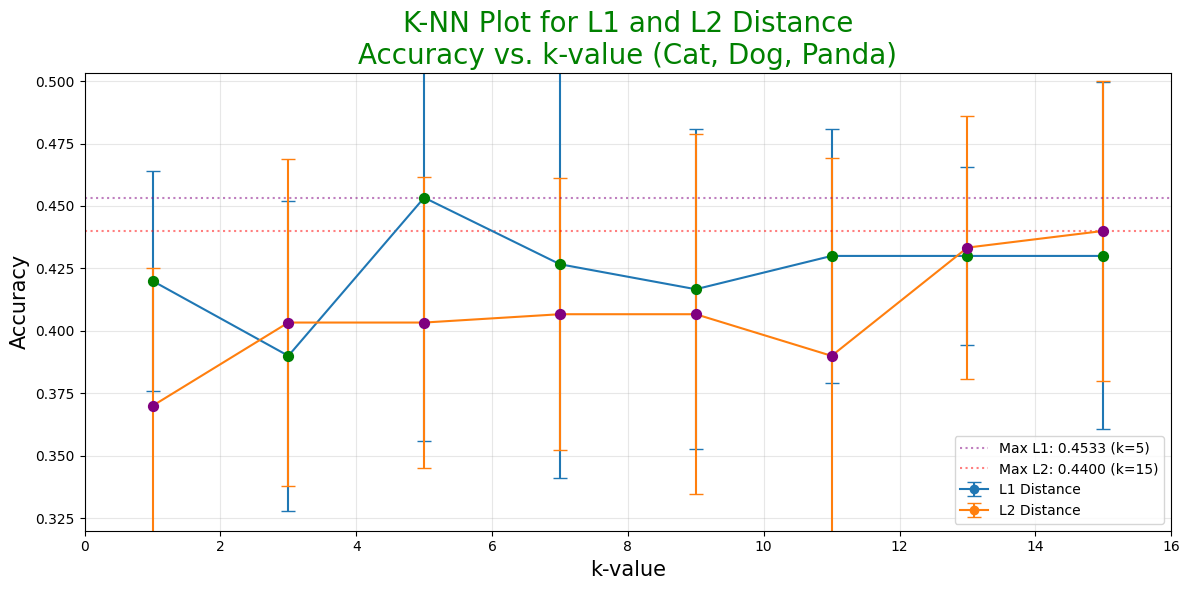


Best L1 Accuracy: 0.4533 at k=5
Best L2 Accuracy: 0.4400 at k=15


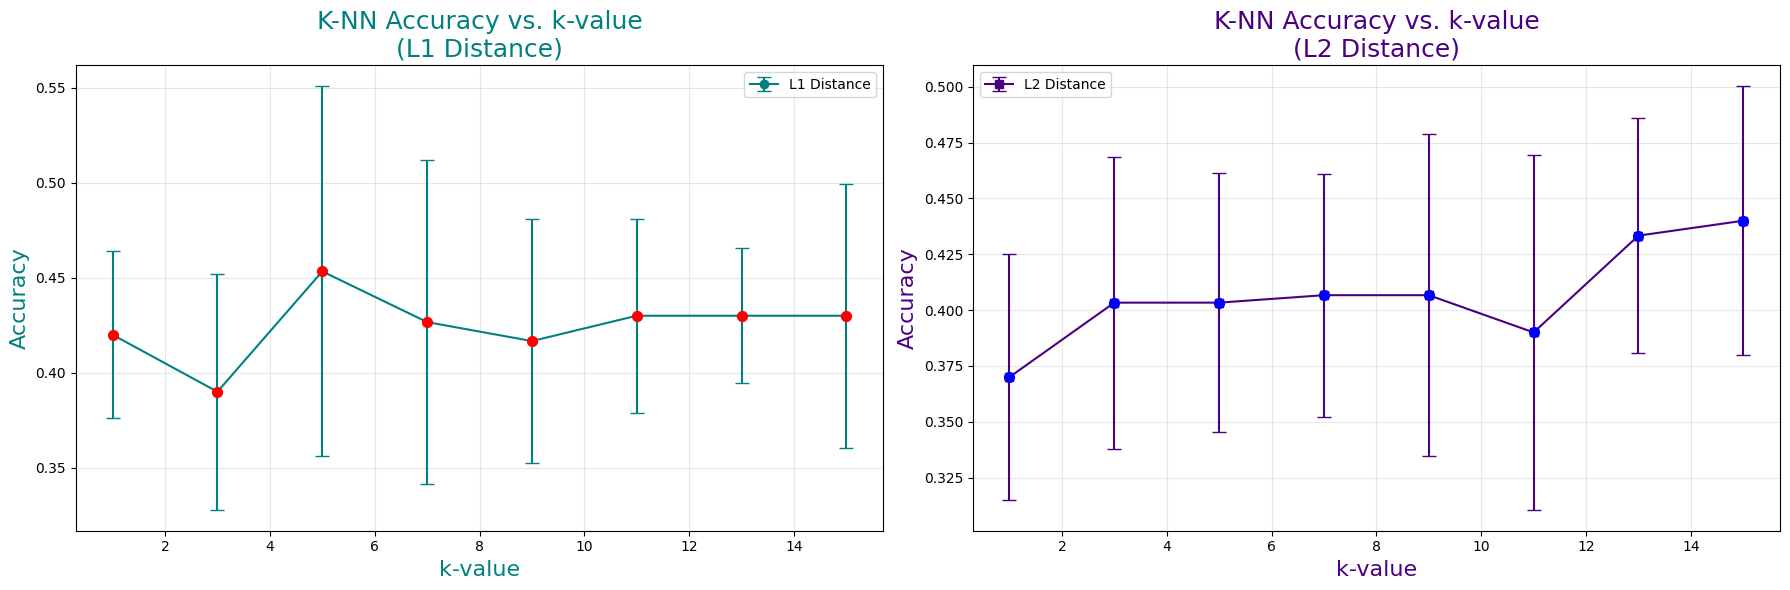

In [66]:
#Combined
k_values = list(range(1, k_max + 1, 2))
plt.figure(figsize=(12, 6))

#Plot the lines with error bars
plt.errorbar(k_values, mean_accuracies_l1, yerr=std_accuracies_l1, label="L1 Distance", marker='o', capsize=5)
plt.errorbar(k_values, mean_accuracies_l2, yerr=std_accuracies_l2, label="L2 Distance", marker='o', capsize=5)

#Plot the data points
plt.scatter(k_values, mean_accuracies_l1, color="green", marker="o", s=50, zorder=5)
plt.scatter(k_values, mean_accuracies_l2, color="purple", marker="o", s=50, zorder=5)

plt.xlabel("k-value", size=15)
plt.ylabel("Accuracy", size=15)
plt.title("K-NN Plot for L1 and L2 Distance\nAccuracy vs. k-value (Cat, Dog, Panda)", size=20, color="green")
plt.xlim(0, k_max + 1)
plt.ylim(min(min(mean_accuracies_l1), min(mean_accuracies_l2)) - 0.05,
         max(max(mean_accuracies_l1), max(mean_accuracies_l2)) + 0.05)
plt.grid(True, alpha=0.3)

max_accuracy_l1 = max(mean_accuracies_l1)
max_accuracy_l2 = max(mean_accuracies_l2)
best_k_l1 = k_values[mean_accuracies_l1.index(max_accuracy_l1)]
best_k_l2 = k_values[mean_accuracies_l2.index(max_accuracy_l2)]

plt.axhline(y=max_accuracy_l1, linestyle='dotted', color='purple', alpha=0.5, label=f'Max L1: {max_accuracy_l1:.4f} (k={best_k_l1})')
plt.axhline(y=max_accuracy_l2, linestyle='dotted', color='red', alpha=0.5, label=f'Max L2: {max_accuracy_l2:.4f} (k={best_k_l2})')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

print(f"\nBest L1 Accuracy: {max_accuracy_l1:.4f} at k={best_k_l1}")
print(f"Best L2 Accuracy: {max_accuracy_l2:.4f} at k={best_k_l2}")


#Separate
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Plot for Manhattan(L1) distance
ax1.errorbar(k_values, mean_accuracies_l1, yerr=std_accuracies_l1, label="L1 Distance", color="teal", marker='o', capsize=5)
ax1.scatter(k_values, mean_accuracies_l1, color="red", marker="o", s=50, zorder=5)
ax1.set_xlabel("k-value", size=16, color="teal")
ax1.set_ylabel("Accuracy", size=16, color="teal")
ax1.set_title("K-NN Accuracy vs. k-value\n(L1 Distance)", size=18, color="teal")
ax1.grid(True, alpha=0.3)
ax1.legend()

# Plot for Euclidean(L2) distance
ax2.errorbar(k_values, mean_accuracies_l2, yerr=std_accuracies_l2, label="L2 Distance", color="indigo", marker='s', capsize=5)
ax2.scatter(k_values, mean_accuracies_l2, color="blue", marker="o", s=50, zorder=5)
ax2.set_xlabel("k-value", size=16, color="indigo")
ax2.set_ylabel("Accuracy", size=16, color="indigo")
ax2.set_title("K-NN Accuracy vs. k-value\n(L2 Distance)", size=18, color="indigo")
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

#**Discussion and top 5 predictions on test images**

In [67]:
print(type(TRAIN_DATA))

<class 'list'>


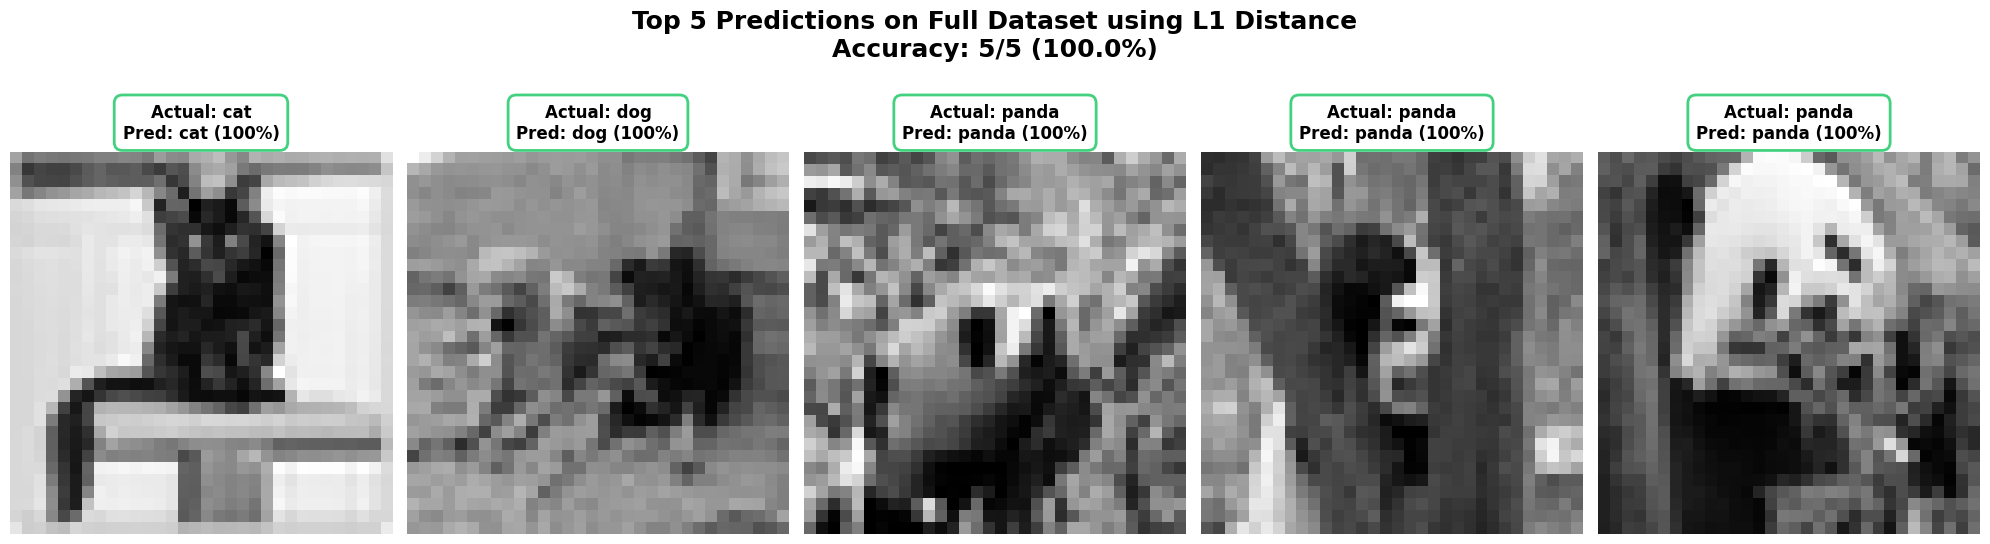



L1 Distance Top 5 Predictions Summary
--------------------------------------------------------------------------------
  ✓ Correct: 5/5 (100.0%)
  ✗ Incorrect: 0/5 (0.0%)



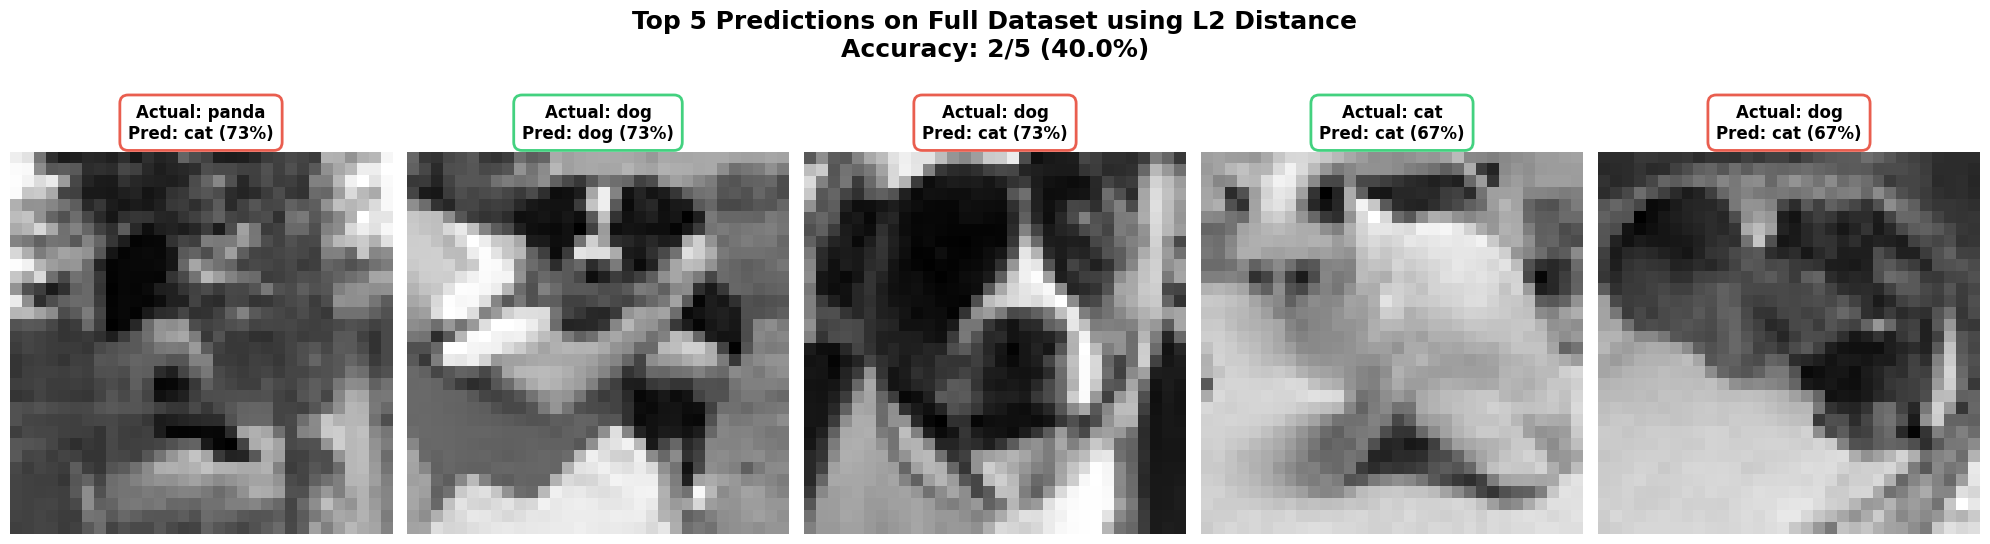



L2 Distance Top 5 Predictions Summary
--------------------------------------------------------------------------------
  ✓ Correct: 2/5 (40.0%)
  ✗ Incorrect: 3/5 (60.0%)



TOP 5 PREDICTION COMPARISON
--------------------------------------------------------------------------------
L1 Distance performed better by 60.0%


In [68]:
best_k_l1 = k_values[mean_accuracies_l1.index(max(mean_accuracies_l1))]
best_k_l2 = k_values[mean_accuracies_l2.index(max(mean_accuracies_l2))]

# Make predictions for all images
all_predictions_l1 = []
all_predictions_l2 = []
all_confidences_l1 = []
all_confidences_l2 = []

for img_idx, (image_gray, actual_class) in enumerate(TRAIN_DATA):
    #L1
    distances1 = [(l1_dist(image_gray, train_img), train_class) for train_img, train_class in TRAIN_DATA]
    distances1.sort(key=lambda x: x[0])

    neighbors_l1 = [d[1] for d in distances1[:best_k_l1]]
    counts_l1 = np.bincount(neighbors_l1, minlength=3)
    pred_l1 = np.argmax(counts_l1)
    confidence_l1 = counts_l1[pred_l1] / best_k_l1 * 100
    all_predictions_l1.append(pred_l1)
    all_confidences_l1.append(confidence_l1)

    #L2
    distances2 = [(l2_dist(image_gray, train_img), train_class) for train_img, train_class in TRAIN_DATA]
    distances2.sort(key=lambda x: x[0])
    neighbors_l2 = [d[1] for d in distances2[:best_k_l2]]
    counts_l2 = np.bincount(neighbors_l2, minlength=3)
    pred_l2 = np.argmax(counts_l2)
    confidence_l2 = counts_l2[pred_l2] / best_k_l2 * 100
    all_predictions_l2.append(pred_l2)
    all_confidences_l2.append(confidence_l2)


def show_top_predictions(TRAIN_DATA, predictions, confidences, distance_type='L1', top_n=5):
    top_indices = np.argsort(confidences)[-top_n:][::-1]

    fig = plt.figure(figsize=(20, 6))
    correct_count = 0
    for i, idx in enumerate(top_indices):
        ax = plt.subplot(1, top_n, i+1)
        image_gray, actual_class = TRAIN_DATA[idx]
        predicted_class = predictions[idx]
        confidence = confidences[idx]
        is_correct = actual_class == predicted_class
        if is_correct:
            correct_count += 1

        # Add border color for correctness
        border_color = '#2ecc71' if is_correct else '#e74c3c'
        for spine in ax.spines.values():
            spine.set_edgecolor(border_color)
            spine.set_linewidth(4)

        ax.imshow(image_gray, cmap='gray')
        title_text = f'Actual: {CATEGORIES[actual_class]}\nPred: {CATEGORIES[predicted_class]} ({confidence:.0f}%)'
        ax.set_title(title_text, fontsize=12, fontweight='bold', pad=10,
                     bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor=border_color,
                               linewidth=2, alpha=0.9))
        ax.axis('off')

    accuracy = correct_count / top_n * 100
    plt.suptitle(f'Top 5 Predictions on Full Dataset using {distance_type} Distance\n'
                 f'Accuracy: {correct_count}/{top_n} ({accuracy:.1f}%)',
                 fontsize=18, fontweight='bold', y=0.98,
    )
    plt.tight_layout(rect=[0,0,1,0.96])
    plt.show()

    # Print summary
    print(f"\n\n{distance_type} Distance Top {top_n} Predictions Summary")
    print("-"*80)
    print(f"  ✓ Correct: {correct_count}/{top_n} ({accuracy:.1f}%)")
    print(f"  ✗ Incorrect: {top_n-correct_count}/{top_n} ({100-accuracy:.1f}%)\n")

    return accuracy

#L1
L1_accuracy = show_top_predictions(TRAIN_DATA, all_predictions_l1, all_confidences_l1, distance_type='L1', top_n=5)
#L2
L2_accuracy = show_top_predictions(TRAIN_DATA, all_predictions_l2, all_confidences_l2, distance_type='L2', top_n=5)

#final comparison
print("\n\nTOP 5 PREDICTION COMPARISON")
print("-"*80)

if L1_accuracy > L2_accuracy:
    print(f"L1 Distance performed better by {L1_accuracy - L2_accuracy:.1f}%")
elif L2_accuracy > L1_accuracy:
    print(f"L2 Distance performed better by {L2_accuracy - L1_accuracy:.1f}%")
else:
    print("Both distance metrics performed equally!")
